## Objective: 
    The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets
## Dataset:
    Need to Classify the animal type


## Tasks:
    1. Analyse the data using the visualizations
    2. Preprocess the data by handling missing values & Outliers, if any.
    3. Split the dataset into training and testing sets (80% training, 20% testing).
    4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
    5. Choose an appropriate distance metric and value for K.
    6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
    7. Visualize the decision boundaries of the classifier.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Zoo.csv')

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df['animal name'].value_counts()

animal name
frog        2
aardvark    1
bass        1
antelope    1
bear        1
           ..
wallaby     1
wasp        1
wolf        1
worm        1
wren        1
Name: count, Length: 100, dtype: int64

In [5]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

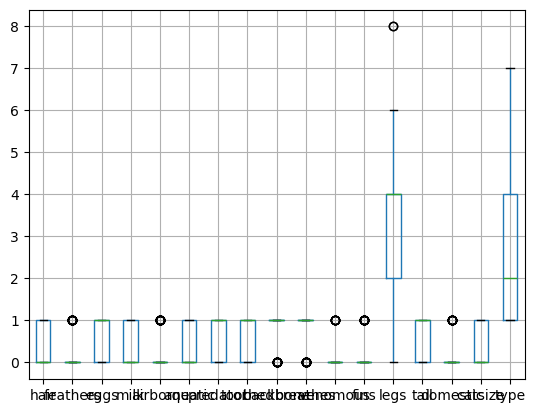

In [7]:
df.boxplot()
plt.show()

In [8]:
def outliercapping(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    df[col]=df[col].apply(lambda x:upper if x>upper else lower if x<lower else x)
for col in df.select_dtypes(['int','float']).columns:
    outliercapping(df,col)

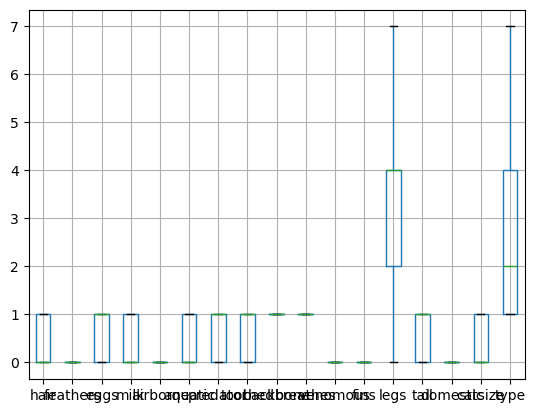

In [9]:
df.boxplot()
plt.show()

In [10]:
features=df.drop(columns=['type','animal name'])
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0
3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1


In [11]:
target=df[['type']]
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80, 1)
(21, 1)


In [15]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_predict=knn.predict(x_test)

In [17]:
accuracy_score(y_test,y_predict)

0.9523809523809523

In [18]:
params=dict(n_neighbors=range(1,30))
params

{'n_neighbors': range(1, 30)}

In [19]:
grid_search=GridSearchCV(knn,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 30)})

In [20]:
grid_search.best_params_

{'n_neighbors': 1}

In [21]:
acc=accuracy_score(y_test,y_predict)
pre=precision_score(y_test,y_predict,average='weighted')
rec=recall_score(y_test,y_predict,average='weighted')
f1=f1_score(y_test,y_predict,average='weighted')

In [22]:
print("Accuracy:",acc)
print("Precision:",pre)
print("Recall:",rec)
print("F1-Score",f1)

Accuracy: 0.9523809523809523
Precision: 0.9206349206349206
Recall: 0.9523809523809523
F1-Score 0.9333333333333333


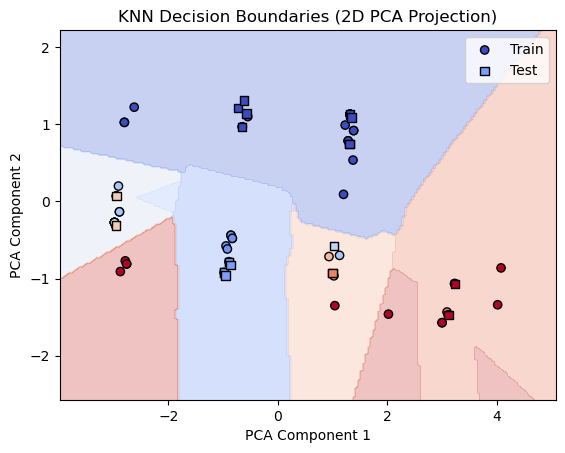

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


knn_vis = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_vis.fit(x_train_pca, y_train)


x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)


Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)


plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, edgecolor='k',
            cmap=plt.cm.coolwarm, marker='o', label="Train")


plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, edgecolor='k',
            cmap=plt.cm.coolwarm, marker='s', label="Test")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundaries (2D PCA Projection)")
plt.legend()
plt.show()


## Interview Questions:
    1. What are the key hyperparameters in KNN?
    
            The key Hyperparameters used in KNN is n_neighbours which is used to decide how many neighbours vote for classification or contribute to regression.
            
    2. What distance metrics can be used in KNN?
    
             Euclidean distance is one of the diatnce metrics used in KNN.It is used to calculate the ditance between the nearest neighbours 
                                               Formula = np.sqrt(Xi-Yi)**2
